<a href="https://colab.research.google.com/github/priyankaborwanker/Game-Theory-Social-Incentive-Mechanism/blob/main/Game_Theory_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assumptions:
1. The amount of work each participant is willing to contribute and pressure is initialized at random
2. Zero cost is associated with task of applying pressure and contributing
3. Kaggle Dataset Link = https://www.kaggle.com/competitions/learning-social-circles/data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def create_friend_matrix(k):
  # Open the file for reading
  # Specify the name of the output text file
  output_filename = "/content/drive/MyDrive/compiled_egonets.txt"
  with open('compiled_egonets.txt', 'r') as f:
    # Initialize an empty dictionary to store the adjacency list
    adj_list = {}

    # Loop through each line in the file
    i = 0
    for line in f:
        # Split the line into two parts using the colon as the delimiter
        parts = line.strip().split(':')

        # The first part is the node number
        node = int(parts[0])-1

        # The second part is the list of connected nodes
        connected_nodes = list(map(int, parts[1].strip().split()))

        # Subtract 1 from each value in the connected_nodes list
        connected_nodes = [x - 1 for x in connected_nodes]
        less_than_k = []
        for j in range(0,len(connected_nodes)):
          if(connected_nodes[j]<k):
            less_than_k.append(connected_nodes[j])

        # Store the adjacency list in the dictionary
        adj_list[node] = less_than_k
        i+=1
        if(i>=k):
            break
    return adj_list


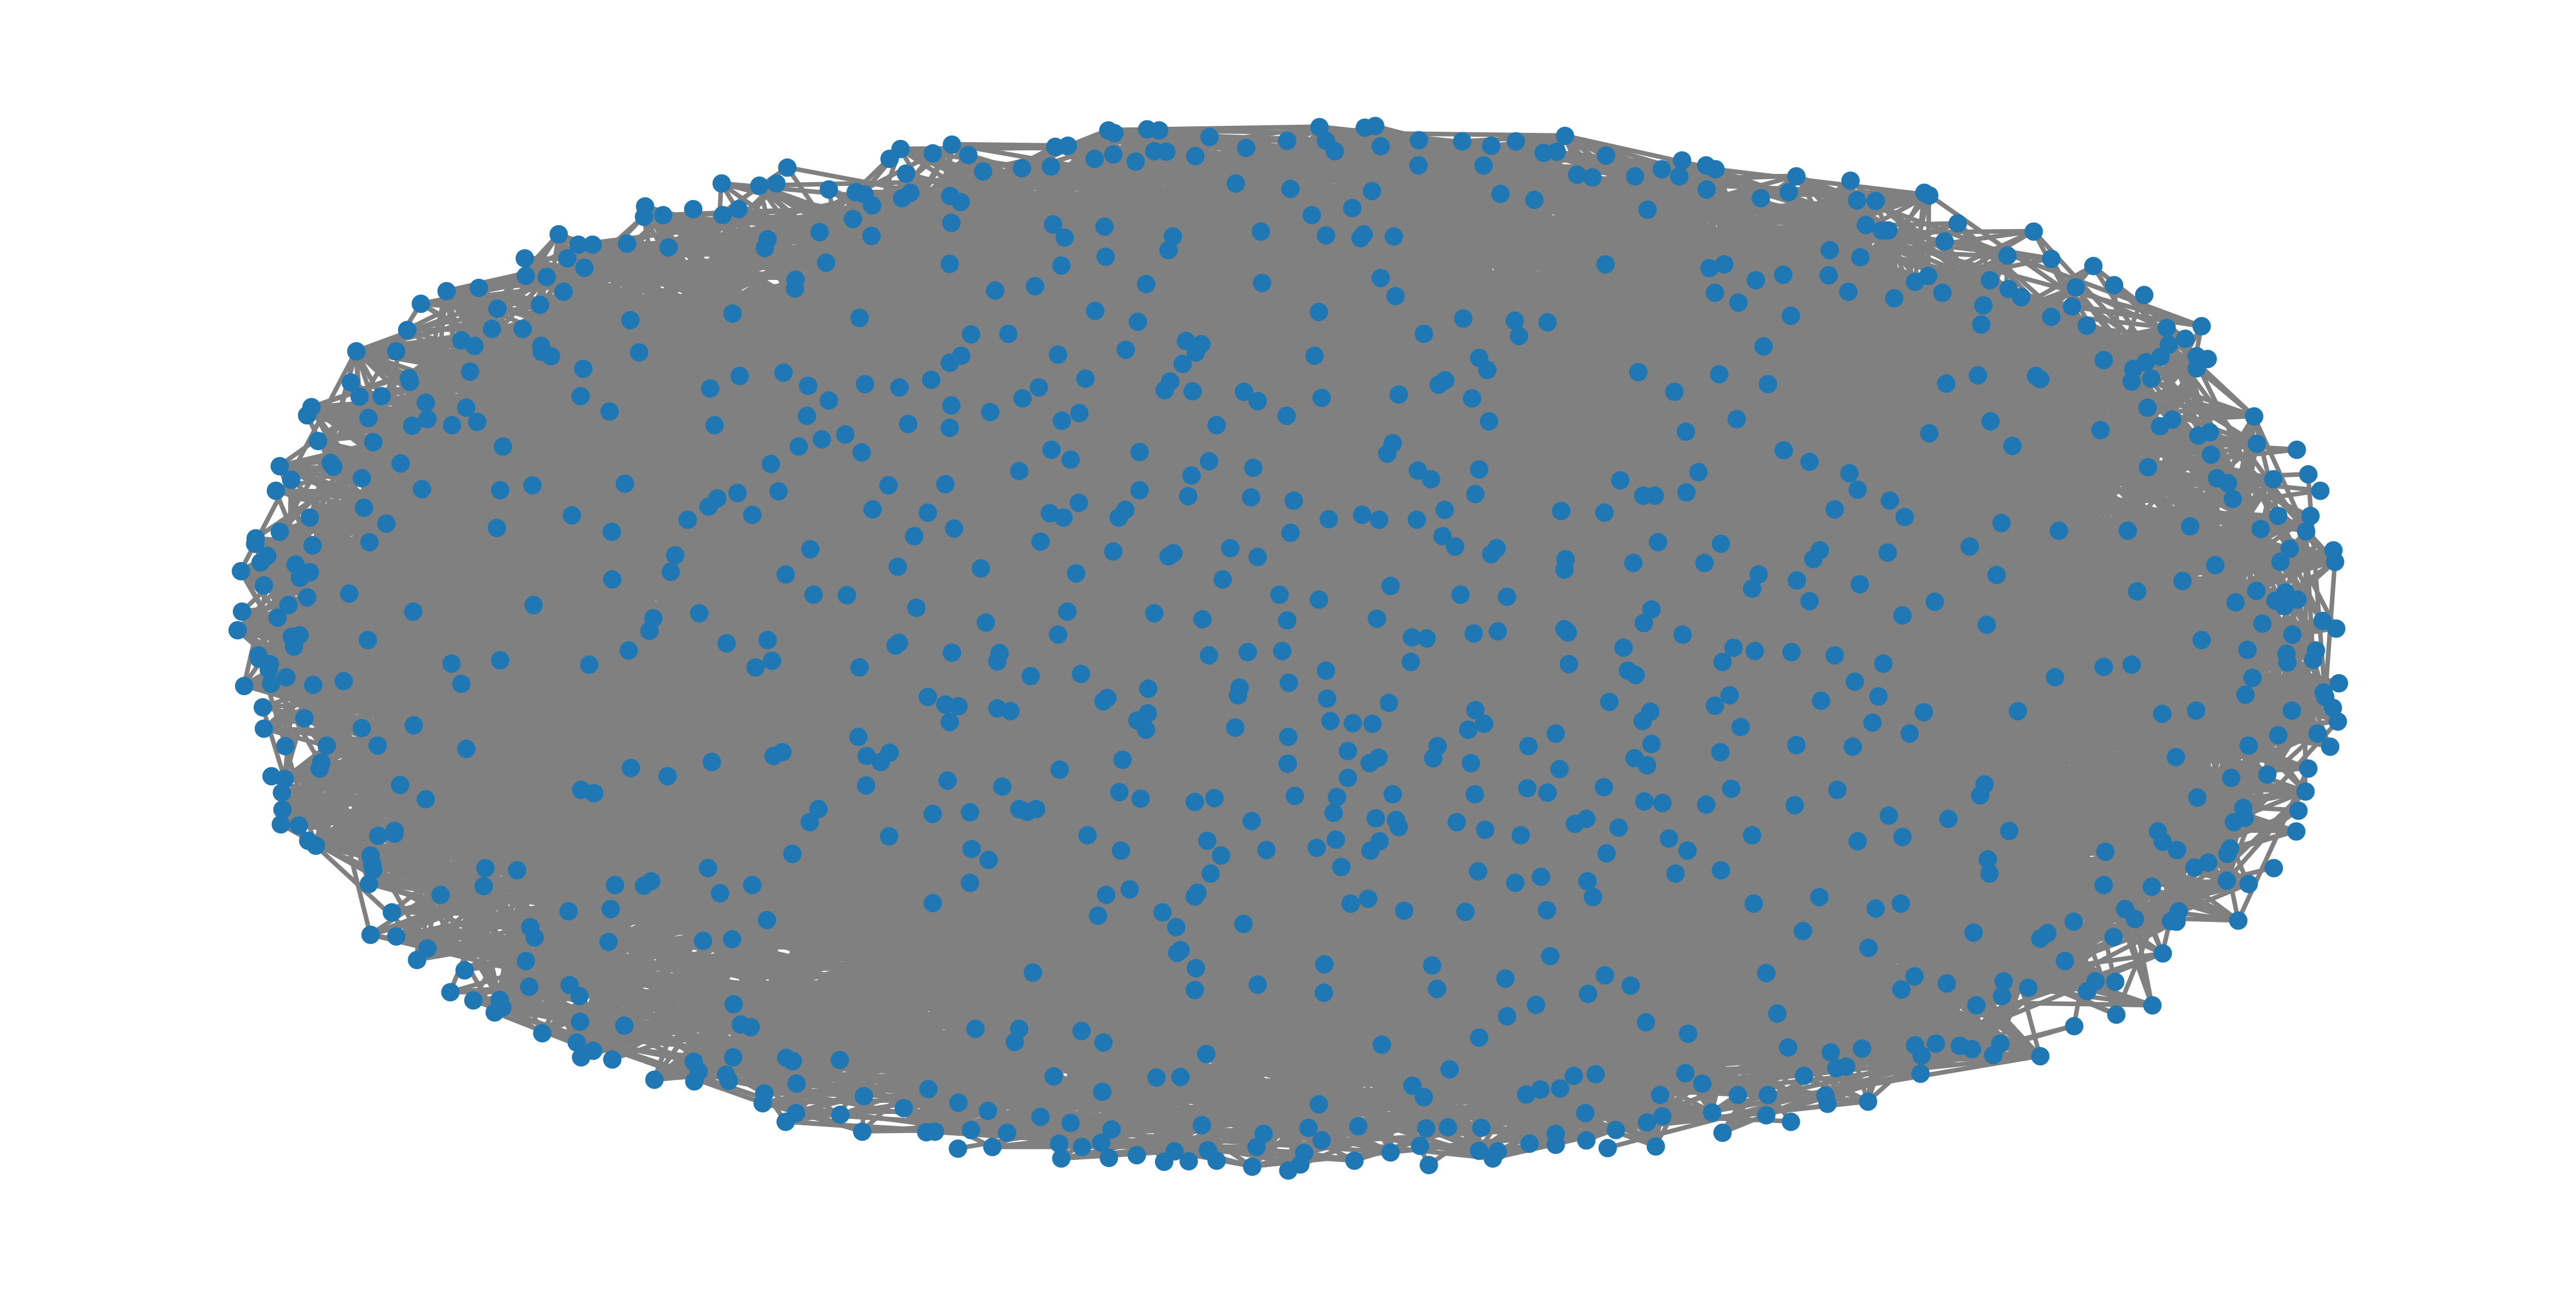

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10), dpi=300)

# Define the adjacency list
adj_list = create_friend_matrix(1000)

# Create a new graph object
G = nx.Graph()

# Add edges to the graph based on the adjacency list
for node, neighbors in adj_list.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

# Draw the graph using a spring layout
pos = nx.spring_layout(G, k = 1)
nx.draw(G, pos, node_size=50, width=2, edge_color='gray')

# Show the plot
plt.show()

In [ ]:
import random

def social_incentive_payoff_function(friend_matrix,contribution,pressure,n):
  res = [0 for i in range(n)]
  for i in range(n):
    friends = friend_matrix[i]
    res[i] = contribution[i]
    p = 0
    d = len(friends)
    for j in range(0,len(friends)):
      p += pressure[i]*contribution[friends[j]]
    if d==0:
      d = 1;
    res[i]+=(p/d)
  return res

def update_strategy(social_incentive_payoff,contribution,pressure,friend_matrix,n):
  #update amount of work willing to contribute
  #match strategy to that neighbour who has most profit
  #recalculate all profits
  for i in range(n):
    my_poff = social_incentive_payoff[i]
    friends = friend_matrix[i]
    for j in range(0,len(friends)):
      if(j!=i and social_incentive_payoff[j]>social_incentive_payoff[i]):
        updated_contribution = contribution[friends[j]]
        if updated_contribution>contribution[i]:
          contribution[i] = updated_contribution
        updated_pressure = (pressure[friends[j]]*len(friends)/(len(friend_matrix[friends[j]])))
        if updated_pressure>pressure[i]:
          pressure[i] = updated_pressure
        social_incentive_payoff = social_incentive_payoff_function(friend_matrix,contribution,pressure,n)
  return social_incentive_payoff


def simulate(n, threshold):

  # amount of work they are willing to contribute
  contribution = [random.randint(1,5) for i in range(n)]

  # pressure
  pressure = [random.random() for i in range(n)]

  #friend matrix
  friend = create_friend_matrix(n)

  # payoff function
  social_incentive_payoff = [0 for i in range(n)]

  #Iterations to find the best payoff values and most optimal contribution, pressure
  average_pressure = []
  average_contribution = []
  social_welfare_i = []

  social_incentive_payoff = social_incentive_payoff_function(friend,contribution,pressure,n)

  i = 1
  while True:
    previous_payoffs = sum(social_incentive_payoff)
    updated_payoffs = update_strategy(social_incentive_payoff,contribution,pressure,friend,n)
    average_pressure.append(sum(pressure)/n);
    average_contribution.append(sum(contribution)/n);
    print("Iteration ",i, "Social Welfare = ",sum(social_incentive_payoff),"Average pressure: ",(sum(pressure)/len(pressure)),"Average contribution: ",(sum(contribution)/len(contribution)));
    social_welfare_i.append(sum(social_incentive_payoff))
    if abs(previous_payoffs - sum(updated_payoffs))<threshold:
      break
    i+=1
    social_incentive_payoff = updated_payoffs
  return social_welfare_i,average_contribution, average_pressure

In [ ]:
pressure_iteration = []
contribution_iteration = []
social_welfare = []
number_of_iterations = 5
n = 250 #number of participants
threshold = 50
for i in range(number_of_iterations):
  print("---ROUND ",i+1,"---")
  s,c,p = simulate(n, threshold);
  pressure_iteration.append(p)
  contribution_iteration.append(c)
  social_welfare.append(s)

---ROUND  1 ---
Iteration  1 Social Welfare =  1132.7751882502782 Average pressure:  5.187628835932967 Average contribution:  4.8
Iteration  2 Social Welfare =  7627.101715108922 Average pressure:  9.79497432789844 Average contribution:  4.824
Iteration  3 Social Welfare =  13405.576589179735 Average pressure:  20.196967369831285 Average contribution:  4.824
Iteration  4 Social Welfare =  26408.067891595783 Average pressure:  29.627864844648062 Average contribution:  4.824
Iteration  5 Social Welfare =  38196.68973511677 Average pressure:  29.854803407719032 Average contribution:  4.824
Iteration  6 Social Welfare =  38480.36293895546 Average pressure:  29.85480340771905 Average contribution:  4.824
---ROUND  2 ---
Iteration  1 Social Welfare =  1064.0432564809967 Average pressure:  11.442838070060768 Average contribution:  4.836
Iteration  2 Social Welfare =  15457.364399536265 Average pressure:  16.410531046369403 Average contribution:  4.856
Iteration  3 Social Welfare =  21681.9837

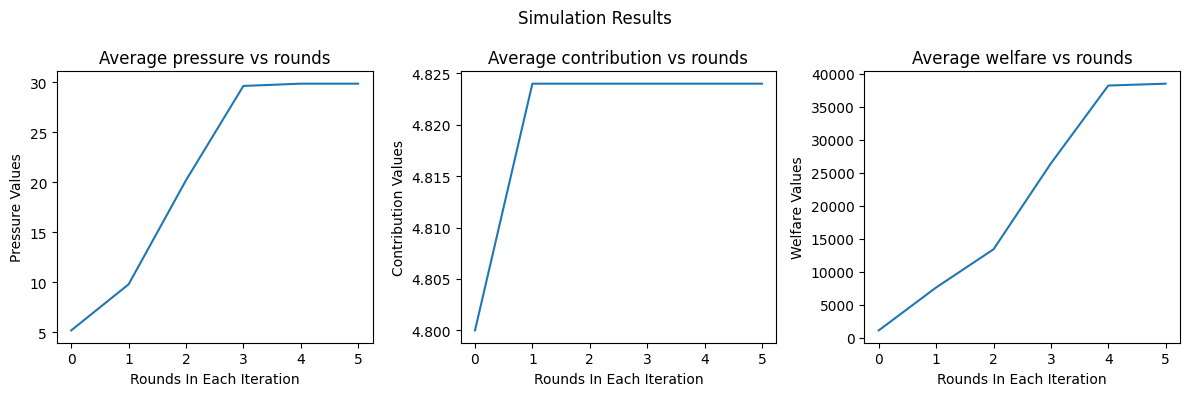

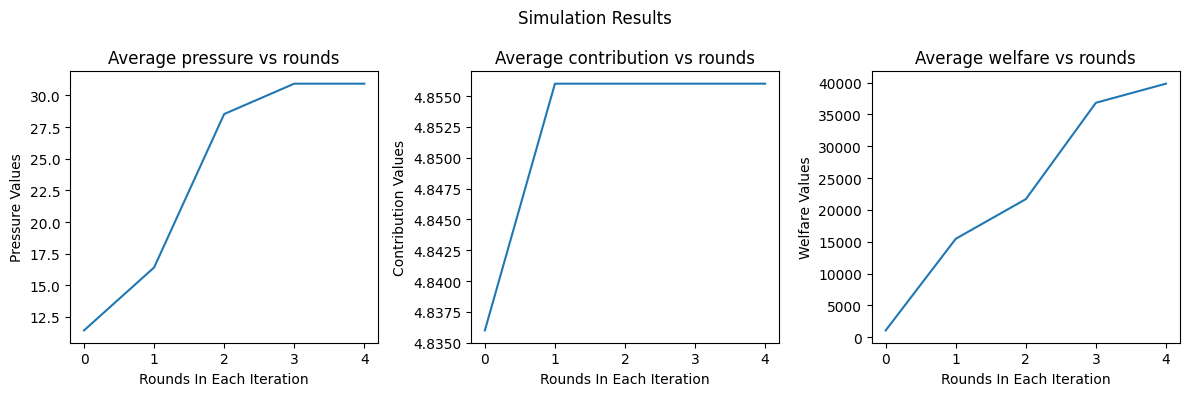

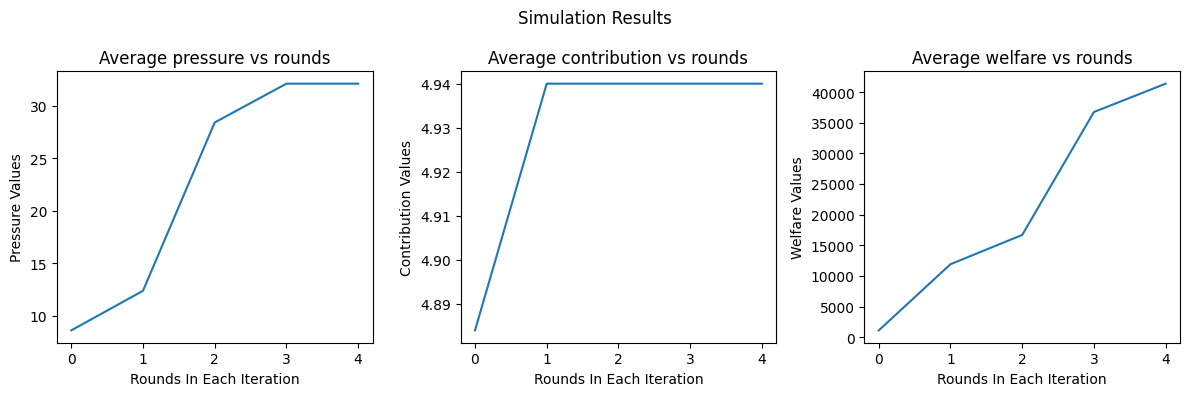

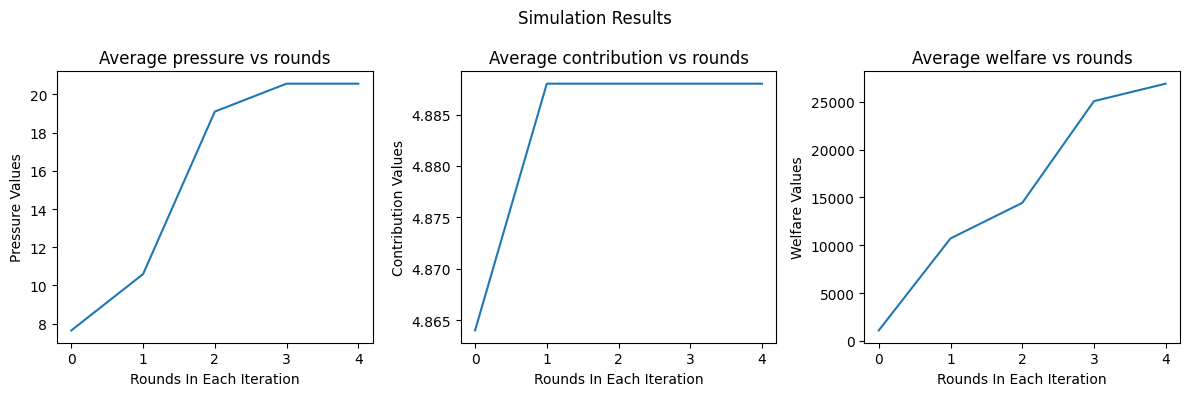

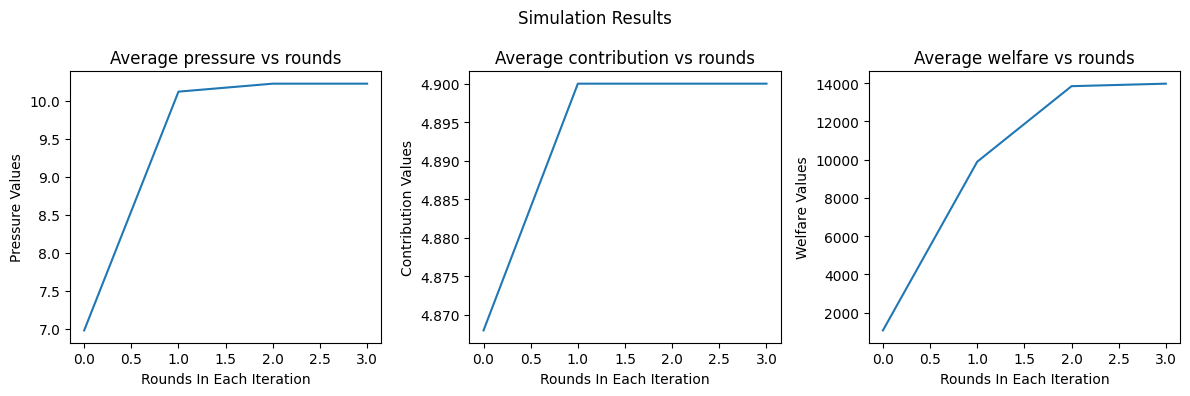

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(number_of_iterations):
  # Create a 1x3 grid of subplots
  fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

  # Plot of pressure on the first subplot
  axs[0].plot(pressure_iteration[i])

  axs[0].set_xlabel('Rounds In Each Iteration')
  axs[0].set_ylabel('Pressure Values')
  axs[0].set_title('Average pressure vs rounds')

  # Plot of contribution on the second subplot
  axs[1].plot(contribution_iteration[i])

  axs[1].set_xlabel('Rounds In Each Iteration')
  axs[1].set_ylabel('Contribution Values')
  axs[1].set_title('Average contribution vs rounds')

  # Plot of social welfare on the third subplot
  axs[2].plot(social_welfare[i])
  axs[2].set_xlabel('Rounds In Each Iteration')
  axs[2].set_ylabel('Welfare Values')
  axs[2].set_title('Average welfare vs rounds')

  # Add a title to the entire figure
  fig.suptitle('Simulation Results')

  # Adjust the layout to prevent overlapping axis labels
  plt.tight_layout()

  # Display the plot
  plt.show()



# STRATEGY 1: CO-OPERATIVE STRATEGY PLAYERS


In [ ]:
def simulate_cooperative(n, threshold):

  # amount of work they are willing to contribute
  contribution = [random.randint(1,5) for i in range(n)]

  # pressure
  pressure = [1 - (random.random()*0.5) for i in range(n)]

  #friend matrix
  friend = create_friend_matrix(n)

  # payoff function
  social_incentive_payoff = [0 for i in range(n)]

  #Iterations to find the best payoff values and most optimal contribution, pressure
  average_pressure = []
  average_contribution = []
  social_welfare_i = []

  social_incentive_payoff = social_incentive_payoff_function(friend,contribution,pressure,n)

  i = 1
  while True:
    previous_payoffs = sum(social_incentive_payoff)
    updated_payoffs = update_strategy(social_incentive_payoff,contribution,pressure,friend,n)
    average_pressure.append(sum(pressure)/n);
    average_contribution.append(sum(contribution)/n);
    print("Iteration ",i, "Social Welfare = ",sum(social_incentive_payoff),"Average pressure: ",sum(pressure)/n,"Average contribution: ",sum(contribution)/n);
    social_welfare_i.append(sum(social_incentive_payoff))
    if abs(previous_payoffs - sum(updated_payoffs))<threshold:
      break
    i+=1
    social_incentive_payoff = updated_payoffs
  return social_welfare_i,average_contribution, average_pressure


In [ ]:
pressure_iteration = []
contribution_iteration = []
social_welfare = []
number_of_iterations = 5
n = 250 #number of participants
threshold = 50
for i in range(number_of_iterations):
  print("---ROUND ",i+1,"---")
  s,c,p = simulate_cooperative(n, threshold);
  pressure_iteration.append(p)
  contribution_iteration.append(c)
  social_welfare.append(s)

---ROUND  1 ---
Iteration  1 Social Welfare =  1347.4993515047813 Average pressure:  8.793521120078466 Average contribution:  4.848
Iteration  2 Social Welfare =  12116.286855250177 Average pressure:  13.542915685608254 Average contribution:  4.892
Iteration  3 Social Welfare =  18095.326963932213 Average pressure:  23.05554891331419 Average contribution:  4.892
Iteration  4 Social Welfare =  29986.118498564658 Average pressure:  24.227668375641265 Average contribution:  4.892
Iteration  5 Social Welfare =  31451.267826473475 Average pressure:  24.227668375641287 Average contribution:  4.892
---ROUND  2 ---
Iteration  1 Social Welfare =  1231.2543043791632 Average pressure:  9.812178613656748 Average contribution:  4.8
Iteration  2 Social Welfare =  13304.378520990185 Average pressure:  14.061689447653189 Average contribution:  4.872
Iteration  3 Social Welfare =  18755.82158669839 Average pressure:  23.310290610080173 Average contribution:  4.872
Iteration  4 Social Welfare =  30316.5

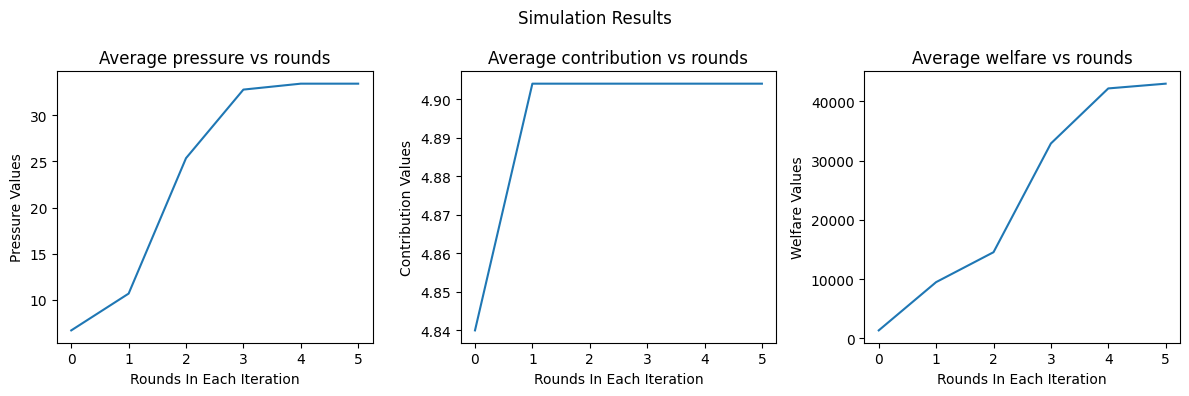

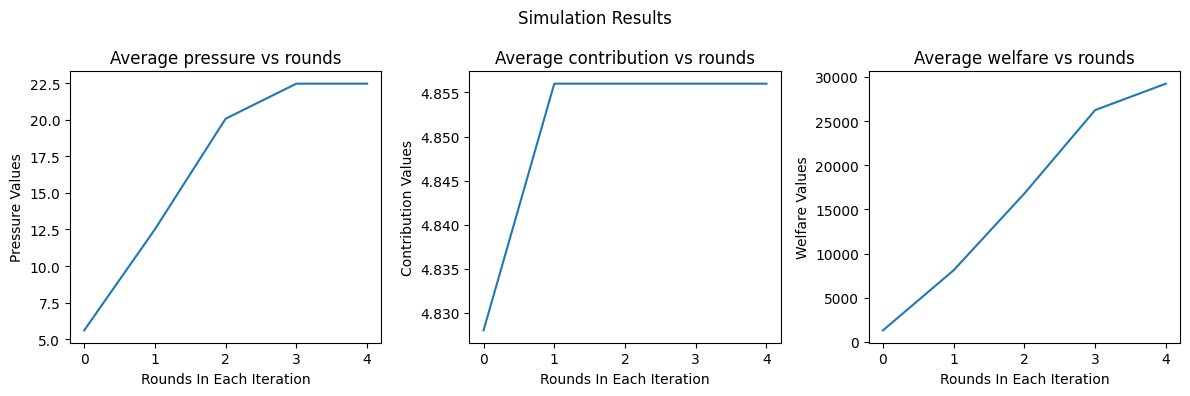

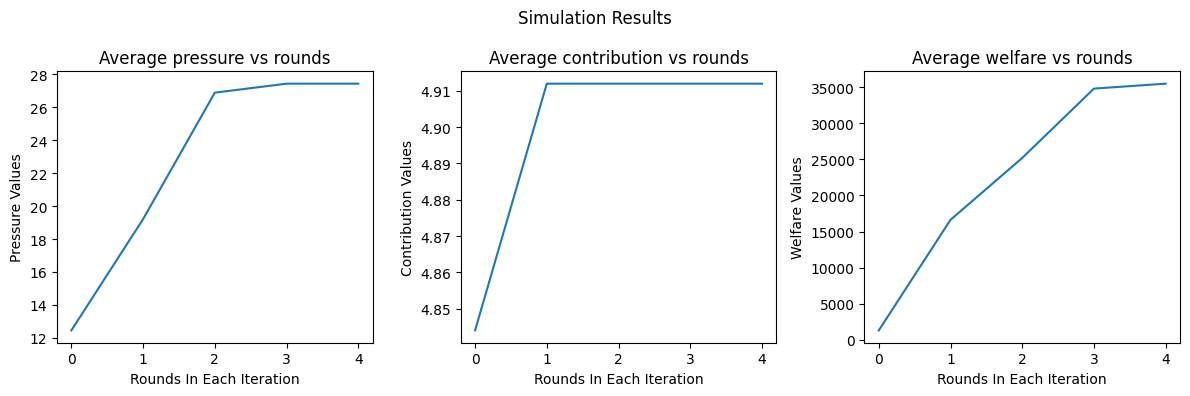

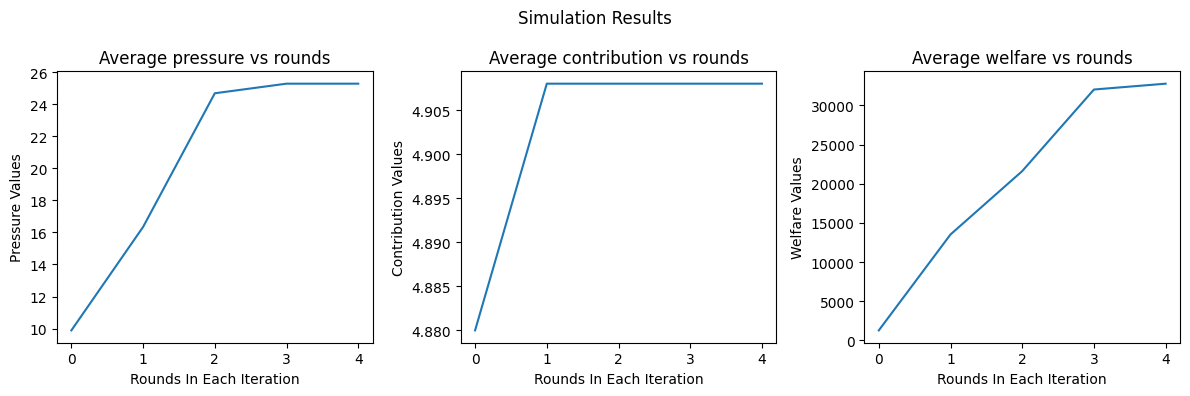

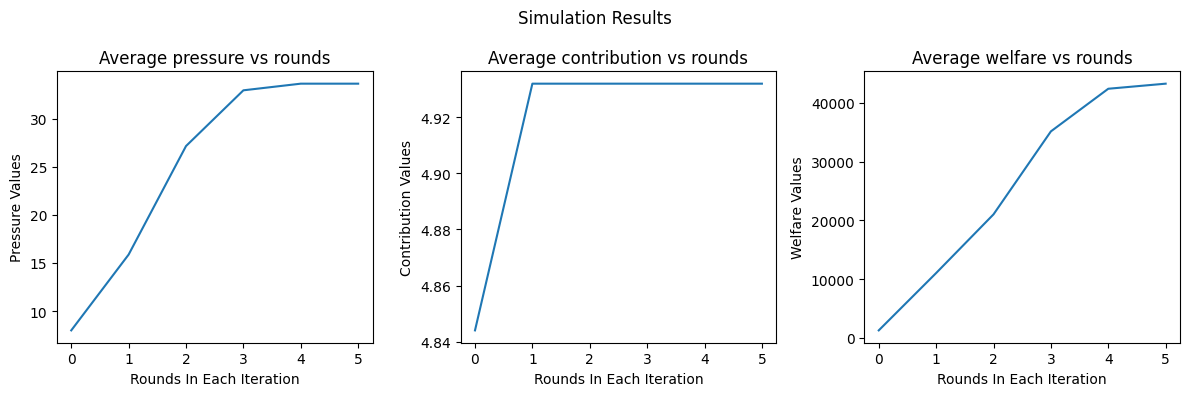

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(number_of_iterations):
  # Create a 1x3 grid of subplots
  fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

  # Plot of pressure on the first subplot
  axs[0].plot(pressure_iteration[i])

  axs[0].set_xlabel('Rounds In Each Iteration')
  axs[0].set_ylabel('Pressure Values')
  axs[0].set_title('Average pressure vs rounds')

  # Plot of contribution on the second subplot
  axs[1].plot(contribution_iteration[i])

  axs[1].set_xlabel('Rounds In Each Iteration')
  axs[1].set_ylabel('Contribution Values')
  axs[1].set_title('Average contribution vs rounds')

  # Plot of social welfare on the third subplot
  axs[2].plot(social_welfare[i])
  axs[2].set_xlabel('Rounds In Each Iteration')
  axs[2].set_ylabel('Welfare Values')
  axs[2].set_title('Average welfare vs rounds')

  # Add a title to the entire figure
  fig.suptitle('Simulation Results')

  # Adjust the layout to prevent overlapping axis labels
  plt.tight_layout()

  # Display the plot
  plt.show()


# STRATEGY 2: INDIVIDUALISTIC PLAYERS

In [ ]:
def simulate_individualistic(n, threshold):

  # amount of work they are willing to contribute
  contribution = [random.randint(1,5) for i in range(n)]

  # pressure
  pressure = [random.random()*0.5 for i in range(n)]

  #friend matrix
  friend = create_friend_matrix(n)

  # payoff function
  social_incentive_payoff = [0 for i in range(n)]

  #Iterations to find the best payoff values and most optimal contribution, pressure
  average_pressure = []
  average_contribution = []
  social_welfare_i = []

  social_incentive_payoff = social_incentive_payoff_function(friend,contribution,pressure)

  i = 1
  while True:
    previous_payoffs = sum(social_incentive_payoff)
    updated_payoffs = update_strategy(social_incentive_payoff,contribution,pressure,friend,n)
    average_pressure.append(sum(pressure)/n);
    average_contribution.append(sum(contribution)/n);
    print("Iteration ",i, "Social Welfare = ",sum(social_incentive_payoff),"Average pressure: ",sum(pressure)/n,"Average contribution: ",sum(contribution)/n);
    social_welfare_i.append(sum(social_incentive_payoff))
    if abs(previous_payoffs - sum(updated_payoffs))<threshold:
      break
    i+=1
    social_incentive_payoff = updated_payoffs
  return social_welfare_i,average_contribution, average_pressure

In [ ]:
pressure_iteration = []
contribution_iteration = []
social_welfare = []
number_of_iterations = 5
n = 250 #number of participants
threshold = 50
for i in range(number_of_iterations):
  print("---ROUND ",i+1,"---")
  s,c,p = simulate_cooperative(n, threshold);
  pressure_iteration.append(p)
  contribution_iteration.append(c)
  social_welfare.append(s)

---ROUND  1 ---
Iteration  1 Social Welfare =  1218.3762692181701 Average pressure:  11.135587018254652 Average contribution:  4.832
Iteration  2 Social Welfare =  14898.835411174741 Average pressure:  16.479803559862674 Average contribution:  4.908
Iteration  3 Social Welfare =  21786.754366879 Average pressure:  28.12744566562907 Average contribution:  4.908
Iteration  4 Social Welfare =  36346.30699908699 Average pressure:  29.377825005750378 Average contribution:  4.908
Iteration  5 Social Welfare =  37909.281174238655 Average pressure:  29.377825005750392 Average contribution:  4.908
---ROUND  2 ---
Iteration  1 Social Welfare =  1308.4225679971005 Average pressure:  6.185595106692178 Average contribution:  4.808
Iteration  2 Social Welfare =  8796.358256522886 Average pressure:  12.318103343485848 Average contribution:  4.892
Iteration  3 Social Welfare =  16581.503771610365 Average pressure:  26.089983522603163 Average contribution:  4.892
Iteration  4 Social Welfare =  33796.35

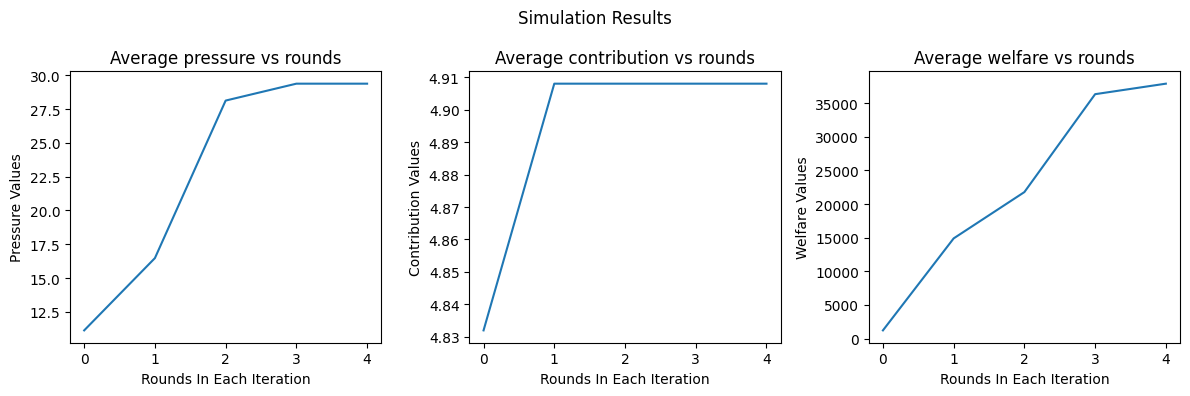

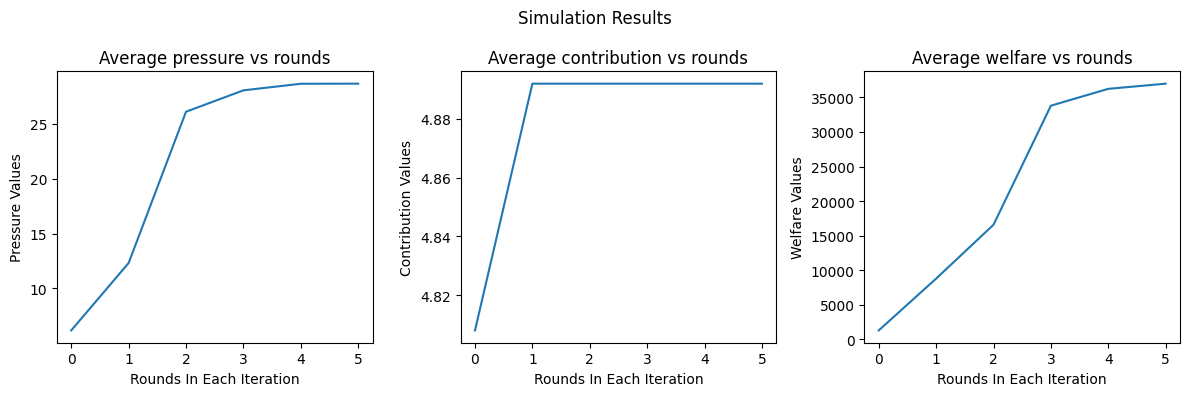

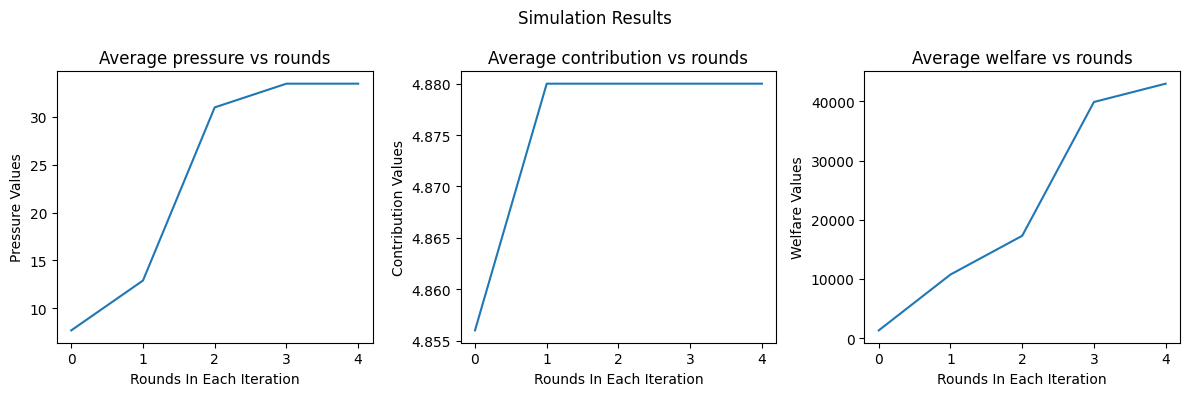

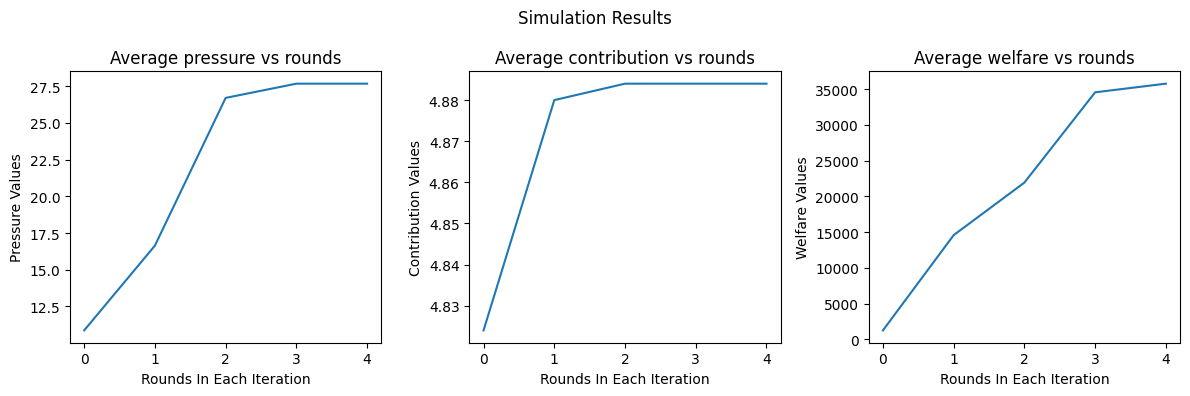

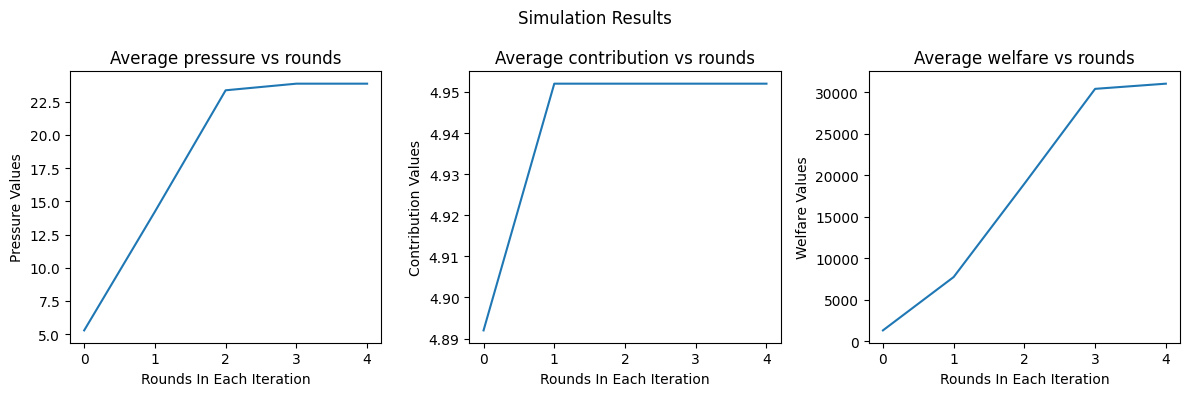

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(number_of_iterations):
  # Create a 1x3 grid of subplots
  fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

  # Plot of pressure on the first subplot
  axs[0].plot(pressure_iteration[i])

  axs[0].set_xlabel('Rounds In Each Iteration')
  axs[0].set_ylabel('Pressure Values')
  axs[0].set_title('Average pressure vs rounds')

  # Plot of contribution on the second subplot
  axs[1].plot(contribution_iteration[i])

  axs[1].set_xlabel('Rounds In Each Iteration')
  axs[1].set_ylabel('Contribution Values')
  axs[1].set_title('Average contribution vs rounds')

  # Plot of social welfare on the third subplot
  axs[2].plot(social_welfare[i])
  axs[2].set_xlabel('Rounds In Each Iteration')
  axs[2].set_ylabel('Welfare Values')
  axs[2].set_title('Average welfare vs rounds')

  # Add a title to the entire figure
  fig.suptitle('Simulation Results')

  # Adjust the layout to prevent overlapping axis labels
  plt.tight_layout()

  # Display the plot
  plt.show()
